In [3]:
## PROJECT IRON MAN, EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r'C:\Users\ASUS\Desktop\courses\projects\iron-man\data\clean\ironman.parquet'
df = pd.read_parquet(file_path)

print("Dataset Shape:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())

Dataset Shape: (331700, 8)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331700 entries, 0 to 331699
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    331700 non-null  object        
 1   StockCode    331700 non-null  object        
 2   Description  331700 non-null  object        
 3   Quantity     331700 non-null  int64         
 4   InvoiceDate  331700 non-null  datetime64[ns]
 5   UnitPrice    331700 non-null  float64       
 6   CustomerID   331700 non-null  int64         
 7   Country      331700 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 20.2+ MB
None


In [5]:
print("\nNumerical Summary:")
print(df[['Quantity', 'UnitPrice']].describe())

print("\nTop 10 Most Sold Products:")
print(df['Description'].value_counts().head(10))

print("\nTop 10 Countries by Transaction Count:")
print(df['Country'].value_counts().head(10))


Numerical Summary:
            Quantity      UnitPrice
count  331700.000000  331700.000000
mean       10.776871       3.966781
std       139.789064      46.546110
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        11.000000       4.130000
max     74215.000000   13541.330000

Top 10 Most Sold Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    1635
REGENCY CAKESTAND 3 TIER              1319
JUMBO BAG RED RETROSPOT               1234
PARTY BUNTING                          979
ASSORTED COLOUR BIRD ORNAMENT          924
LUNCH BAG RED RETROSPOT                841
LUNCH BAG  BLACK SKULL.                817
HEART OF WICKER SMALL                  762
JUMBO STORAGE BAG SUKI                 747
LUNCH BAG CARS BLUE                    742
Name: count, dtype: int64

Top 10 Countries by Transaction Count:
Country
United Kingdom    304126
Germany             5632
EIRE                5234
France              4952
Netherlands 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28176\433852820.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot()


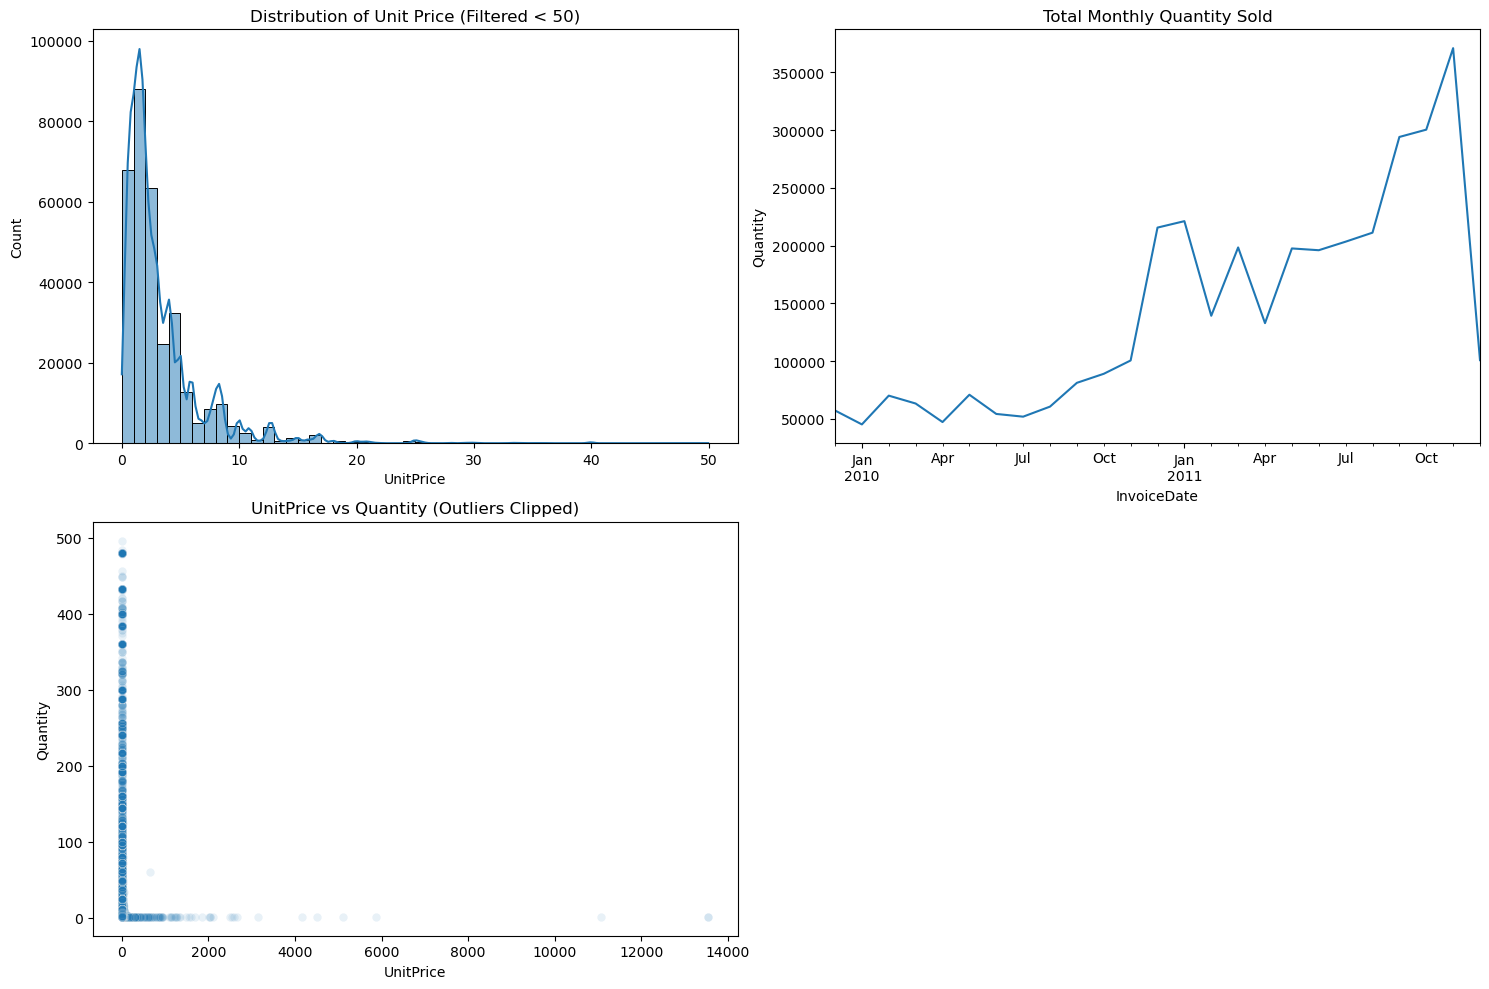

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df[df['UnitPrice'] < 50]['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price (Filtered < 50)')

plt.subplot(2, 2, 2)
df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot()
plt.title('Total Monthly Quantity Sold')
plt.ylabel('Quantity')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df[df['Quantity'] < 500], x='UnitPrice', y='Quantity', alpha=0.1)
plt.title('UnitPrice vs Quantity (Outliers Clipped)')

plt.tight_layout()
plt.show()

Top 5 Highest Value Customers:
            MonetaryValue  Frequency  Quantity
CustomerID                                    
0              1087940.88       2178    250539
18102           196261.63         85     50406
14646           171898.02        102    123936
17450           120567.03         34     44271
14911            93094.96        326     50936


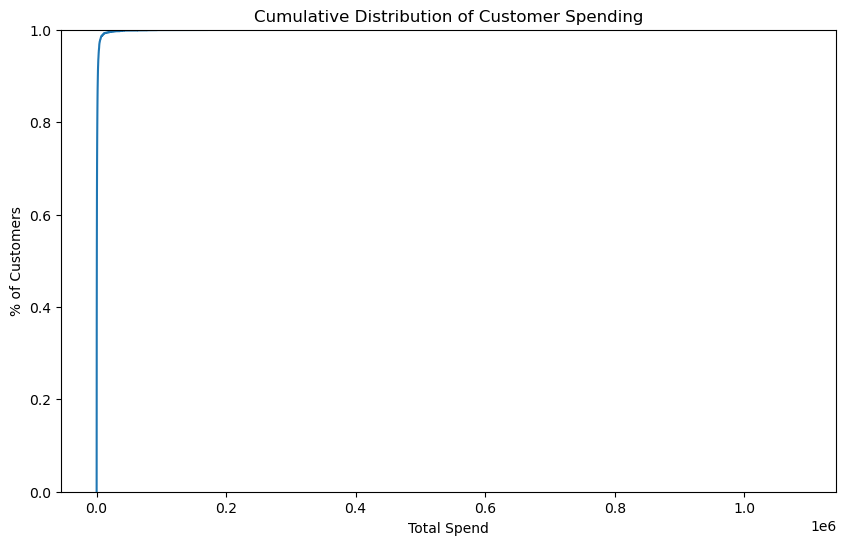

In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue'})

print("Top 5 Highest Value Customers:")
print(customer_data.sort_values('MonetaryValue', ascending=False).head())

plt.figure(figsize=(10, 6))
sns.ecdfplot(customer_data['MonetaryValue'])
plt.title('Cumulative Distribution of Customer Spending')
plt.xlabel('Total Spend')
plt.ylabel('% of Customers')
plt.show()

In [8]:
## Redoing this accounting for Customer 0

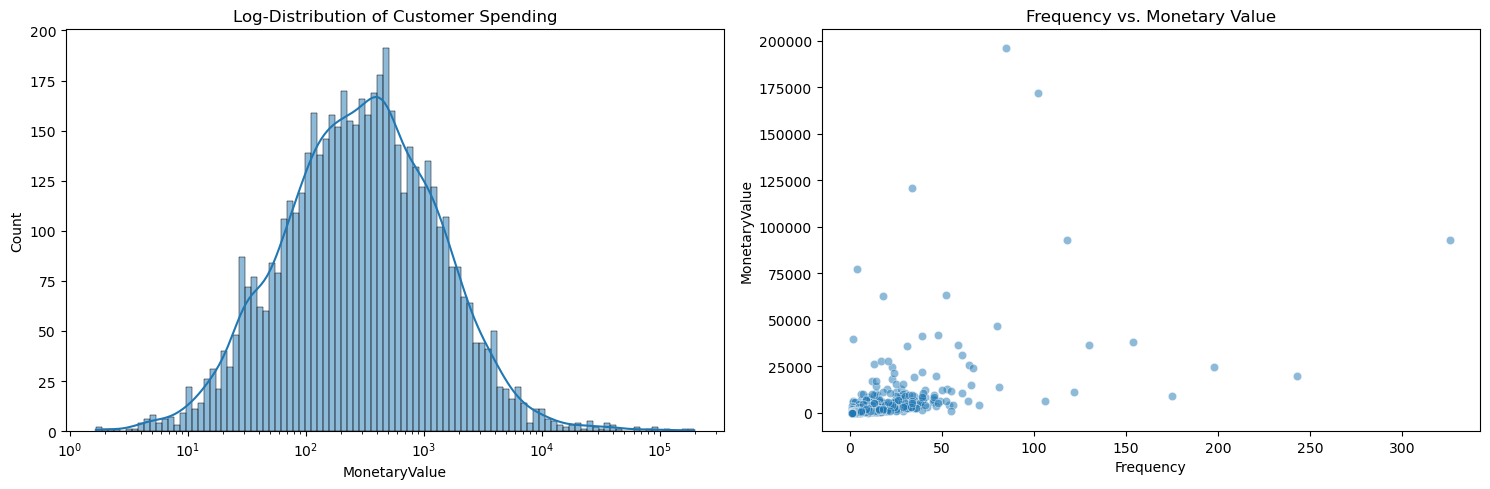

Total identified customers: 5428
Average Spend per Identified Customer: 1027.54


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

real_customers = df[df['CustomerID'] != 0].copy()

real_customer_data = real_customers.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue'})

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(real_customer_data['MonetaryValue'], bins=100, kde=True, log_scale=True)
plt.title('Log-Distribution of Customer Spending')

plt.subplot(1, 2, 2)
sns.scatterplot(data=real_customer_data, x='Frequency', y='MonetaryValue', alpha=0.5)
plt.title('Frequency vs. Monetary Value')

plt.tight_layout()
plt.show()

print(f"Total identified customers: {len(real_customer_data)}")
print(f"Average Spend per Identified Customer: {real_customer_data['MonetaryValue'].mean():.2f}")

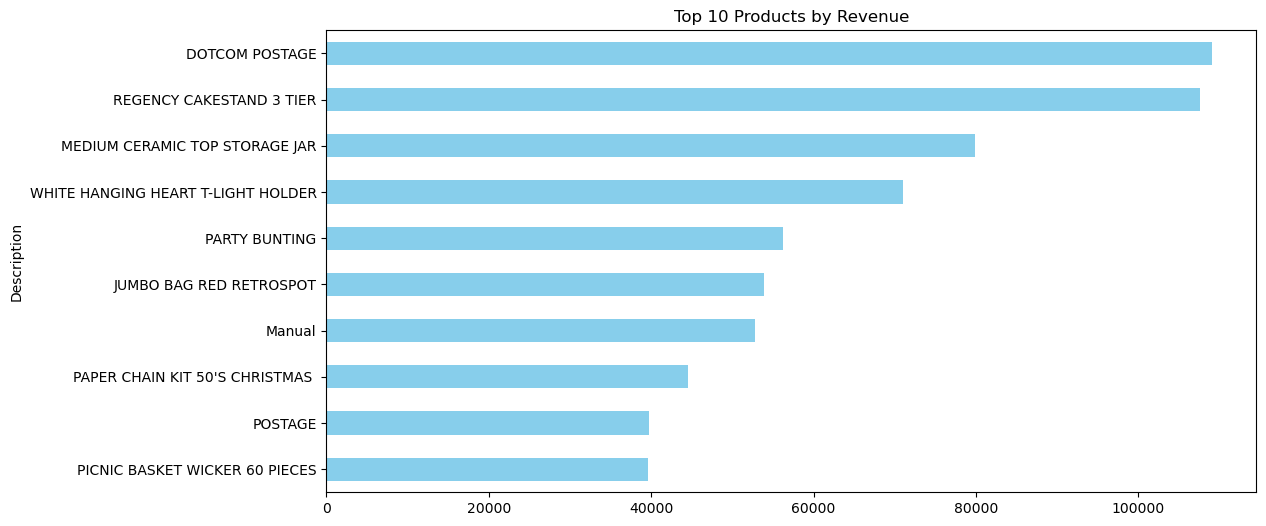

Average items per invoice: 117.15


In [10]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()
plt.show()

items_per_inv = df.groupby('InvoiceNo')['Quantity'].sum()
print(f"Average items per invoice: {items_per_inv.mean():.2f}")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\ASUS\Desktop\courses\projects\iron-man\data\clean\ironman2.parquet'
df = pd.read_parquet(file_path)

# Filter out returns but KEEP Customer 0
df_plot = df[df['Quantity'] > 0].copy()

# Time Features
df_plot['DayOfWeek'] = df_plot['InvoiceDate'].dt.day_name()
df_plot['Hour'] = df_plot['InvoiceDate'].dt.hour

# Pivot Table
pivot_table = df_plot.pivot_table(index='DayOfWeek', 
                                  columns='Hour', 
                                  values='InvoiceNo', 
                                  aggfunc='nunique')

# Monday-Sunday flow
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False)
plt.title('Shopping Patterns: Day of Week vs. Time of Day (Incl. Customer 0, No Returns)')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day (24h Format)')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

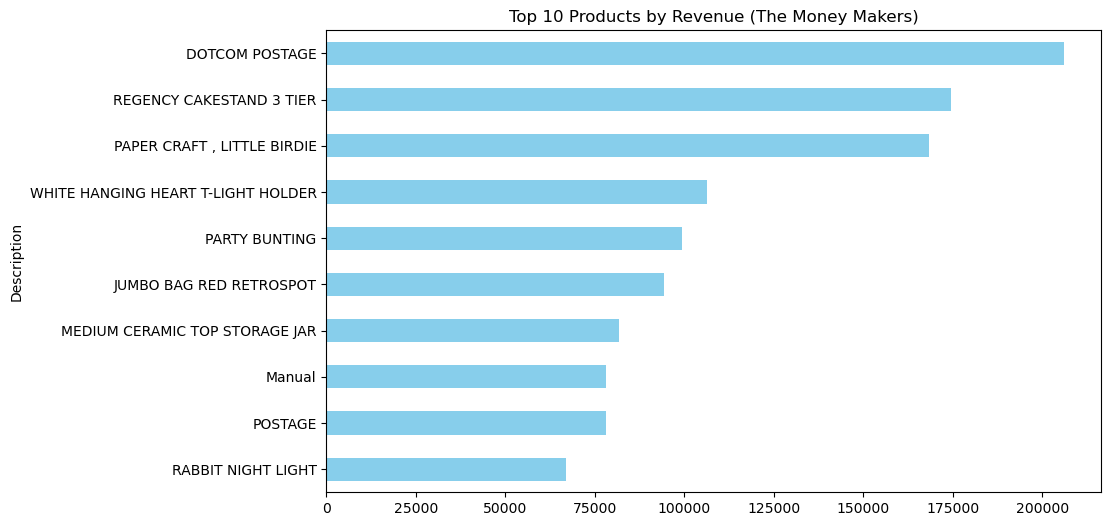

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- SETUP THE DATA ---
# make sure to have the price total for each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# --- MOST SOLD ITEMS (BY REVENUE) ---
top_money = df[df['Quantity'] > 0].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# --- RETURN PROBABILITY (THE HEADACHES) ---
total_sold = df[df['Quantity'] > 0].groupby('Description')['Quantity'].sum().reset_index()

# get returns and fix those negative numbers
returns_only = df[df['Quantity'] < 0].copy()
returns_only['Qty_Abs'] = returns_only['Quantity'].abs()
total_returned = returns_only.groupby('Description')['Qty_Abs'].sum().reset_index()

# use 'left' join to keep everything sold
junk_finder = pd.merge(total_sold, total_returned, on='Description', how='left').fillna(0)
junk_finder.columns = ['Description', 'Sold', 'Returned']

# calculate the percentage
junk_finder['Return_Prob'] = (junk_finder['Returned'] / junk_finder['Sold']) * 100

# only look at stuff that sold at least 20 times (so the % isn't crazy)
top_junk = junk_finder[junk_finder['Sold'] > 20].sort_values('Return_Prob', ascending=False).head(10)

# Graph: The Money Makers
plt.figure(figsize=(10, 6))
top_money.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Revenue (The Money Makers)')
plt.gca().invert_yaxis()
plt.show()

Total return rows found in data: 9288


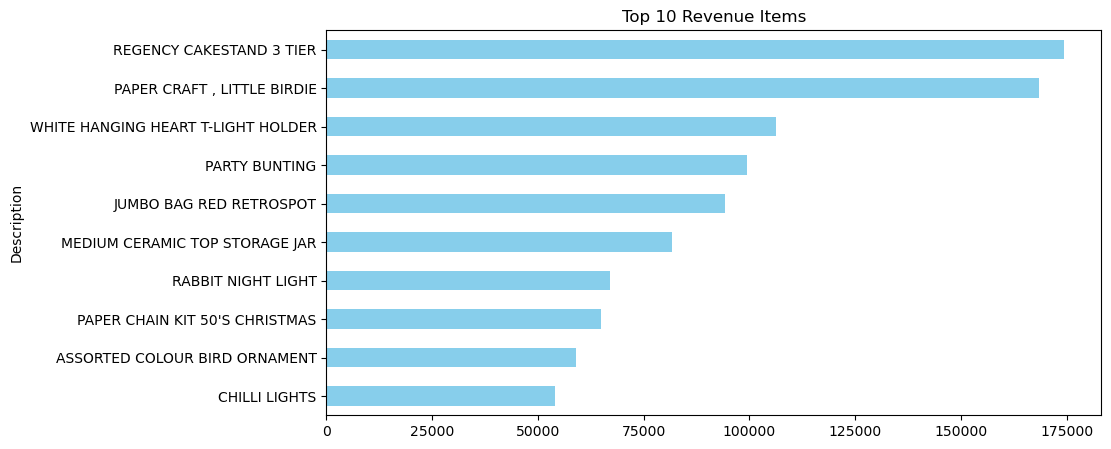

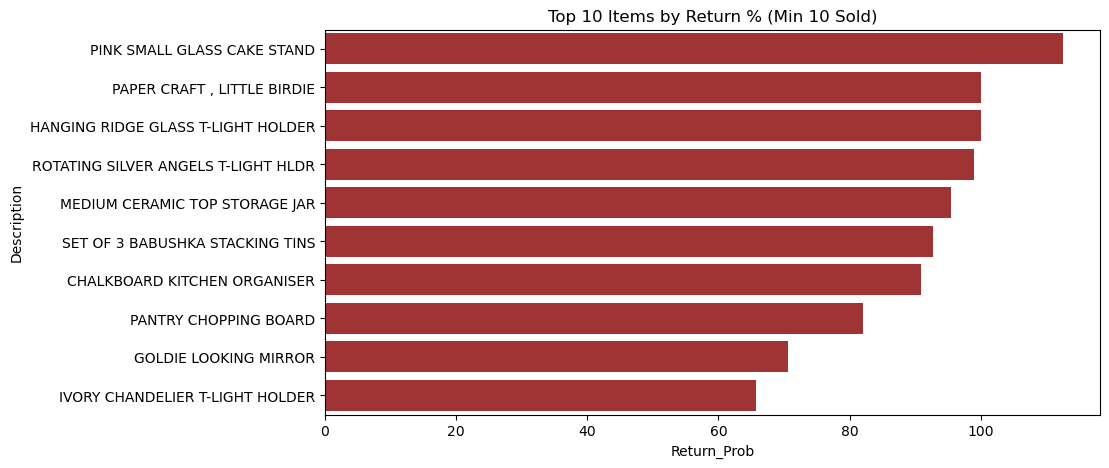


Found these risky items:
                              Description   Sold  Returned  Return_Prob
1255          PINK SMALL GLASS CAKE STAND     24        27   112.500000
1169          PAPER CRAFT , LITTLE BIRDIE  80995     80995   100.000000
782    HANGING RIDGE GLASS T-LIGHT HOLDER     36        36   100.000000
1441  ROTATING SILVER ANGELS T-LIGHT HLDR   9476      9376    98.944702
1010       MEDIUM CERAMIC TOP STORAGE JAR  78033     74494    95.464739
1512      SET OF 3 BABUSHKA STACKING TINS    275       255    92.727273
310          CHALKBOARD KITCHEN ORGANISER     11        10    90.909091
1154                PANTRY CHOPPING BOARD   1154       946    81.975737
733                 GOLDIE LOOKING MIRROR     17        12    70.588235
850       IVORY CHANDELIER T-LIGHT HOLDER    658       432    65.653495


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# THE BIG CHECK: Do I even have returns?
num_returns = len(df[df['Quantity'] < 0])
print(f"Total return rows found in data: {num_returns}")

if num_returns == 0:
    print("!!! ERROR: No negative quantities found. We can't calculate returns if they aren't there!")
else:
    df['Description'] = df['Description'].str.strip()

# remove bank charges
    excluded_items = ['Bank Charges', 'POSTAGE', 'DOTCOM POSTAGE', 'CRUK Commission', 'Manual']
    df = df[~df['Description'].isin(excluded_items)]

    # Get Sales
    sales = df[df['Quantity'] > 0].groupby('Description')['Quantity'].sum().reset_index()
    sales.columns = ['Description', 'Sold']

    # Get Returns (fix negatives first)
    rets = df[df['Quantity'] < 0].copy()
    rets['Qty_Abs'] = rets['Quantity'].abs()
    returns = rets.groupby('Description')['Qty_Abs'].sum().reset_index()
    returns.columns = ['Description', 'Returned']

    # merge them
    # We use an 'inner' join here just to see things that HAVE returns
    stats = pd.merge(sales, returns, on='Description', how='inner')
    stats['Return_Prob'] = (stats['Returned'] / stats['Sold']) * 100

    # Filter for stuff that actually sells
    top_junk = stats[stats['Sold'] > 10].sort_values('Return_Prob', ascending=False).head(10)

    # --- THE GRAPHS ---
    # Top Money Makers
    plt.figure(figsize=(10, 5))
    df[df['Quantity'] > 0].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue')
    plt.title('Top 10 Revenue Items')
    plt.gca().invert_yaxis()
    plt.show()

    # Top Headaches
    if not top_junk.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=top_junk, x='Return_Prob', y='Description', color='firebrick')
        plt.title('Top 10 Items by Return % (Min 10 Sold)')
        plt.show()
        
        print("\nFound these risky items:")
        print(top_junk[['Description', 'Sold', 'Returned', 'Return_Prob']])
    else:
        print("Still nothing. This means no item that was sold was also returned.")

In [15]:
import numpy as np

ml_df = df[df['CustomerID'] != 0].copy()


ml_df['AbsQuantity'] = ml_df['Quantity'].abs()
ml_df['AbsTotal'] = (ml_df['Quantity'] * ml_df['UnitPrice']).abs()


snapshot_date = ml_df['InvoiceDate'].max() + pd.Timedelta(days=1)

feature_table = ml_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'AbsTotal': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'AbsTotal': 'Monetary'
})


sales_total = ml_df[ml_df['Quantity'] > 0].groupby('CustomerID')['AbsTotal'].sum()
returns_total = ml_df[ml_df['Quantity'] < 0].groupby('CustomerID')['AbsTotal'].sum()

feature_table['Return_Amount'] = returns_total.reindex(feature_table.index).fillna(0)
feature_table['Return_Rate'] = (feature_table['Return_Amount'] / feature_table['Monetary']) * 100


print("Final ML Feature Table (First 5 Rows):")
print(feature_table.head())

TypeError: can only concatenate str (not "Timedelta") to str

In [16]:
import pandas as pd
import os

# Load the updated cleaned file
file_path = r'C:\Users\ASUS\Desktop\courses\projects\iron-man\data\clean\ironman2.parquet'
df = pd.read_parquet(file_path)

# Filter for identified customers and calculate LineTotal
ml_df = df[df['CustomerID'] != 0].copy()
ml_df['LineTotal'] = ml_df['Quantity'] * ml_df['UnitPrice']

# Establish a snapshot date for Recency
snapshot_date = ml_df['InvoiceDate'].max() + pd.Timedelta(days=1)

#Aggregate to Customer Level (Recency, Frequency, Net Monetary)
customer_features = ml_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'LineTotal': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'LineTotal': 'Monetary_Net'
})

# FIX: Calculate Return-Specific Metrics safely
# First, create a temporary column of absolute values for the whole dataframe
ml_df['AbsLineTotal'] = ml_df['LineTotal'].abs()

# Now sum up only the rows that were originally negative (returns)
total_return_val = ml_df[ml_df['Quantity'] < 0].groupby('CustomerID')['AbsLineTotal'].sum()
# Sum up only the rows that were positive (sales)
total_sales_val = ml_df[ml_df['Quantity'] > 0].groupby('CustomerID')['AbsLineTotal'].sum()

# Add to our table and calculate Return Rate
customer_features['Return_Amount'] = total_return_val.reindex(customer_features.index).fillna(0)
customer_features['Return_Rate'] = (customer_features['Return_Amount'] / total_sales_val.reindex(customer_features.index)) * 100
customer_features['Return_Rate'] = customer_features['Return_Rate'].fillna(0)

print("Feature Table Created Successfully!")
print(customer_features.head())

TypeError: can only concatenate str (not "Timedelta") to str

In [17]:
# Create the base RFM features
ml_feature_table = ml_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'LineTotal': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'LineTotal': 'Monetary_Net'
})

# Add the Return metrics (now in the SAME table)
ml_feature_table['Return_Amount'] = total_return_val.reindex(ml_feature_table.index).fillna(0)
ml_feature_table['Return_Rate'] = (ml_feature_table['Return_Amount'] / total_sales_val.reindex(ml_feature_table.index)) * 100
ml_feature_table['Return_Rate'] = ml_feature_table['Return_Rate'].fillna(0)

# Final Check: Everything should be in ml_feature_table now
print("Columns in your single ML Table:", ml_feature_table.columns.tolist())
print(ml_feature_table.head())

NameError: name 'snapshot_date' is not defined

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scaling: ML models struggle if one number is 1,000 and another is 0.1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ml_feature_table)

# Clustering: Find 4 "Loyalty Buckets"
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
ml_feature_table['Cluster'] = kmeans.fit_predict(scaled_features)

#Identify the characteristics of each bucket
bucket_analysis = ml_feature_table.groupby('Cluster').mean()
print(bucket_analysis)

NameError: name 'ml_feature_table' is not defined

In [ ]:
'''
1. Feature Engineering (The RFM-R Framework)
Before clustering, I had to transform raw transaction rows into a customer-level summary. I calculated:
Recency: The number of days since the last purchase.
Frequency: The total count of unique successful invoices per customer.
Monetary: The net sum of all transactions (Quantity × UnitPrice).
Return Rate: A custom metric calculating the percentage of returned items versus total purchases to identify operational costs.

2. Log Transformation (Handling Skewness)
This was the most important preprocessing step. Real-world retail data is usually "heavy-tailed"—meaning a few customers spend massive amounts of money or have extreme return rates, while most spend very little.
The Issue: Without this, the few "Whale" outliers would pull the cluster centers toward them, leaving 95% of your customers in one giant, undifferentiated group.
The Solution: We applied np.log1p (natural log of $1+x$) to the features. This compressed the range of values, making the distribution more "normal" (Gaussian) and allowing the algorithm to see the subtle differences between the 1,817 "New/Occasional" shoppers and the 1,521 "Steady" customers.

3. Feature Scaling (Standardization)
K-Means uses Euclidean distance (the "straight-line" distance between points) to group data.
The Issue: If one column is measured in "Days" (Recency: 0–365) and another in "Dollars" (Monetary: 0–100,000), the algorithm will treat the Dollar column as much more important simply because the numbers are larger.
The Solution: We used StandardScaler to transform all features so they have a mean of 0 and a standard deviation of 1. This ensured that Recency, Frequency, Monetary, and Return Rate all had an equal "vote" in determining the clusters.

4. Handling Missing Values and Infinite Rates
During the calculation of the Return Rate, some customers had zero purchases (only returns) or other mathematical anomalies that resulted in NaN or Infinite values. 
As part of the preprocessing, we used .fillna(0) and replaced infinite values to ensure the ML model wouldn't crash during the fit process.
'''

Calculating clusters... this will take a moment.


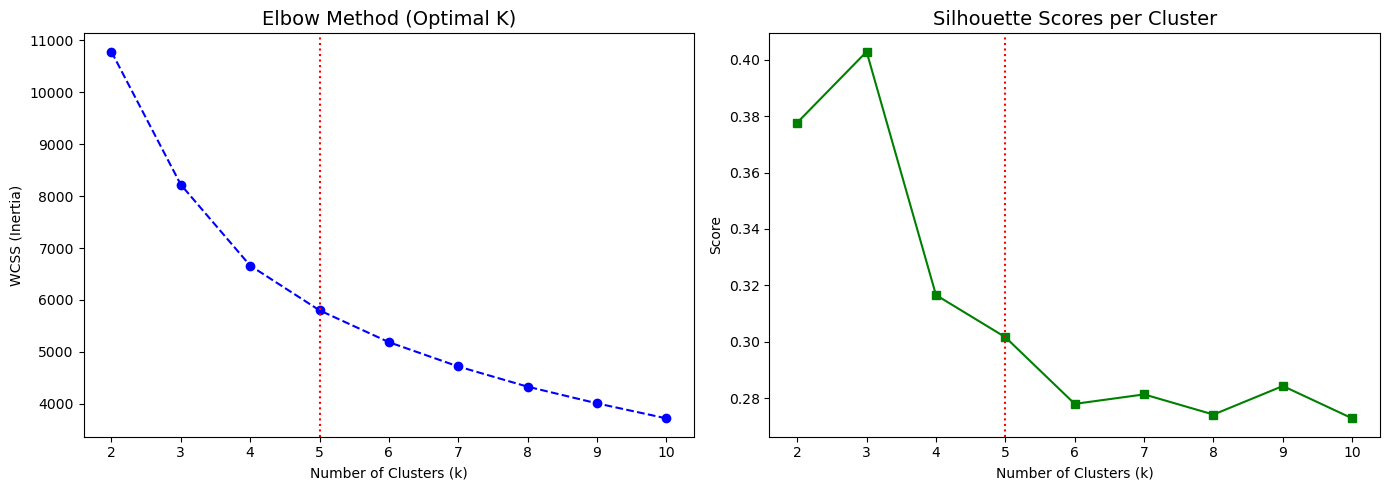

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# --- 1. FIX THE DATE FORMAT & CLEAN ---
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Removing non-product charges (Added .fillna('') to prevent errors)
excluded_items = ['Bank Charges', 'POSTAGE', 'DOTCOM POSTAGE', 'CRUK Commission', 'Manual']
df_clean = df[~df['Description'].fillna('').str.strip().isin(excluded_items)].copy()
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# --- 2. FEATURE ENGINEERING (RFM-R) ---
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouping by Customer
ml_feature_table = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary_Net'})

# --- FIX: Calculating Return Rate Correctly ---
sales_qty = df_clean[df_clean['Quantity'] > 0].groupby('CustomerID')['Quantity'].sum()

# We take the absolute value FIRST, then group and sum
returns_df = df_clean[df_clean['Quantity'] < 0].copy()
returns_df['Quantity_Abs'] = returns_df['Quantity'].abs()
return_qty = returns_df.groupby('CustomerID')['Quantity_Abs'].sum()

ml_feature_table['Return_Rate'] = (return_qty / sales_qty).fillna(0) * 100

# --- 3. LOG TRANSFORMATION & SCALING ---
# We use .abs() on Monetary_Net to handle net negative customers before the log
rfm_log = np.log1p(ml_feature_table[['Recency', 'Frequency', 'Monetary_Net', 'Return_Rate']].abs())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_log)

# --- 4. HYPERPARAMETER TUNING ---
wcss = []
silhouette_avg = []
k_range = range(2, 11)

print("Calculating clusters... this will take a moment.")
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X_scaled, kmeans.labels_))

# --- 5. PLOTTING FOR YOUR SLIDE ---
plt.figure(figsize=(14, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method (Optimal K)', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.axvline(x=5, color='r', linestyle=':') 

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_avg, marker='s', linestyle='-', color='green')
plt.title('Silhouette Scores per Cluster', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.axvline(x=5, color='r', linestyle=':') 

plt.tight_layout()
plt.show()